# Predicting the price of flight ticket with the use of Machine Learning Algorithms

### Abstract
Someone who purchase flight tickets frequently would be able to predict the right time and fare of ticket to obtain the best deal. Airlines change ticket prices for revenue management. To estimate the minimum airfare, data for a specific air route has been collected including features like departure time, arrival time and airways over a period. Features are extracted from the collected data to apply Machine Learning(ML) models.                                         
                                 Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.This case study is aimed at building the machine learning regression models to predict flight prices at the given time.   

# Steps involved in solving this Case Study
- Business Problem
- Load the data
- Exploratory Data Analysis (EDA)
- Splitting the data
- Model Building
- Model Summary
- Cross Validation
- Prediction
- Evaluation of Predicted Results
- Feature Selection
- Optimize the Model if Required
- Deployment/Rollout.

In [1]:
#Imorting all the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#Since the data is excel file we use pandas read_csv to load the data 
df = pd.read_csv("C:/Users/HP840/Desktop/Data_FP.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2021 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2021 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Vizualizing first five rows of data
df.head()         

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2021 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2021 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Vizualizing last five rows of data
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#Checking the dimensions of data
df.shape

(10683, 11)

In [7]:
# Lets look at the summary stats of data
df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10675,10678,10677,10683,10683,10683,10677,10677
unique,12,40,5,6,128,222,1343,368,5,10
top,Jet Airways,18-05-2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4534,4534,2374,233,423,550,5622,8340


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10675 non-null  object
 3   Destination      10678 non-null  object
 4   Route            10677 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10677 non-null  object
 9   Additional_Info  10677 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#Storiing index of numerical and categorical features
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)


Number of Numerical features:  1
Index(['Price'], dtype='object')
Number of Categorical features:  10
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


### Checking if the data has any null values


In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             8
Destination        5
Route              6
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        6
Additional_Info    6
Price              0
dtype: int64

Here as observed above there are some featuers which contains null values, we will impute them accordingly.
Since all the features that has null values are categorical features so we will replace the null values with mode of that particular feature.

# Imputation of null values

In [11]:
df['Source']=df['Source'].fillna(df['Source'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])


In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              6
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    6
Price              0
dtype: int64

Now the data does not have any null values 

In [13]:
# Storing data of all categorical features in variable for furthur execution.`
fc = df.select_dtypes(include='object')


In [14]:
#Checking unique values in the data
for col in categorical_features:
    print('column:','\n',col, '\n', df[col].unique(),'\n')

column: 
 Airline 
 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 

column: 
 Date_of_Journey 
 ['24-03-2019' '01-05-2019' '09-06-2019' '12-05-2019' '01-03-2019'
 '24-06-2019' '12-03-2019' '27-05-2019' '01-06-2019' '18-04-2019'
 '09-05-2019' '24-04-2019' '03-03-2019' '15-04-2019' '12-06-2019'
 '06-03-2019' '21-03-2019' '03-04-2019' '06-05-2019' '15-05-2019'
 '18-06-2019' '15-06-2019' '06-04-2019' '18-05-2019' '27-06-2019'
 '21-05-2019' '03-06-2019' '15-03-2019' '03-05-2019' '09-03-2019'
 '06-06-2019' '24-05-2019' '01-04-2019' '21-04-2019' '21-06-2019'
 '27-03-2019' '18-03-2019' '12-04-2019' '09-04-2019' '27-04-2019'] 

column: 
 Source 
 ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] 

column: 
 Destination 
 ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'] 

column: 
 Route 
 ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO

In [15]:
# Replacing ? in Route Column with (-)
df['Route'] = df['Route'].str.replace("?","-")

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR - DEL,22:20,22-03-2021 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,10-06-2021 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
# Checking for zeros in data
df[df==0].count()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Also there are no zeros in the data

In [18]:
#Checking the data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

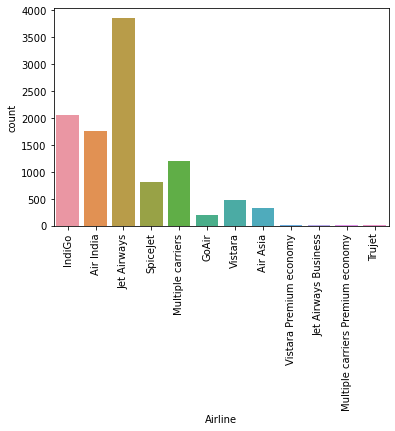

In [19]:
sns.countplot(x='Airline', data=df)
plt.xticks(rotation=90)

- Jet Airways is the most preferred airline as compared to other airlines

<AxesSubplot:xlabel='Source', ylabel='count'>

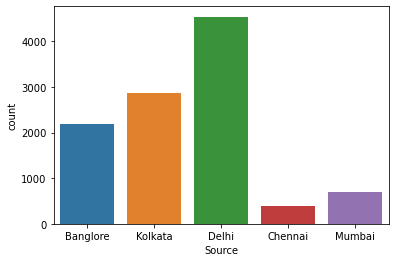

In [20]:
sns.countplot(x='Source', data=df)

- Majority of people starting their journey from Delhi

<AxesSubplot:xlabel='Destination', ylabel='count'>

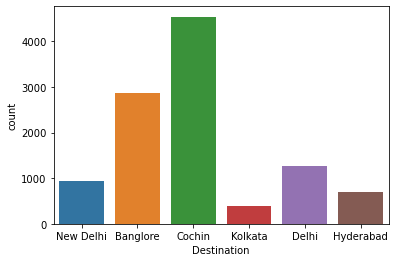

In [21]:
sns.countplot(x='Destination', data=df)

- Cochin is the final destination of majority of people

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

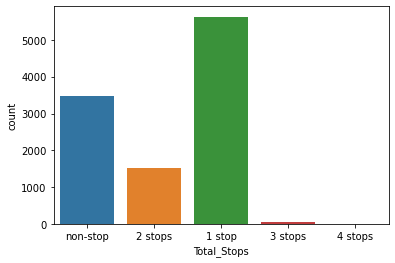

In [22]:
sns.countplot(x='Total_Stops', data=df)

- Here as observed from above plot majority of people has only one stop in journey.

### Checking for Singularity

In [23]:
df.Source.value_counts()/df.shape[0]


Delhi       0.425161
Kolkata     0.268745
Banglore    0.205279
Mumbai      0.065244
Chennai     0.035571
Name: Source, dtype: float64

In [24]:
df.Destination.value_counts()/df.shape[0]

Cochin       0.424881
Banglore     0.268651
Delhi        0.118319
New Delhi    0.087241
Hyderabad    0.065244
Kolkata      0.035664
Name: Destination, dtype: float64

In [25]:
df.Airline.value_counts()/df.shape[0]


Jet Airways                          0.360292
IndiGo                               0.192174
Air India                            0.163999
Multiple carriers                    0.111954
SpiceJet                             0.076570
Vistara                              0.044838
Air Asia                             0.029861
GoAir                                0.018160
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: Airline, dtype: float64

- From description we can see that Date_of_Journey is a object data type
- Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
- For this we require pandas **to_datetime** to convert object data type to datetime dtype.
- <span style="color: green;">**.dt.day method will extract only day of that date**</span>
- <span style="color: green;">**.dt.month method will extract only month of that date**</span>

In [26]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d-%m-%Y").dt.day

In [27]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d-%m-%Y").dt.month

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR - DEL,22:20,22-03-2021 01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,01-05-2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,10-06-2021 04:25,19h,2 stops,No info,13882,9,6
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [29]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [30]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [31]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR - DEL,22-03-2021 01:10,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,10-06-2021 04:25,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [32]:
# Arrival time is when the plane arrives at the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR - DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [34]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))                    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))         # Extracts only minutes from duration

In [35]:
# Adding duration_hours and duration_mins list to train_data dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [36]:
df.drop(["Duration"], axis = 1, inplace = True)

In [37]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR - DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
Duration_hours      int64
Duration_mins       int64
dtype: object

In [39]:
num = df.select_dtypes(include=np.number)
num

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,1,3,11,30,14,10,2,40


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

### Lets see how Airline variable is related to Price variable

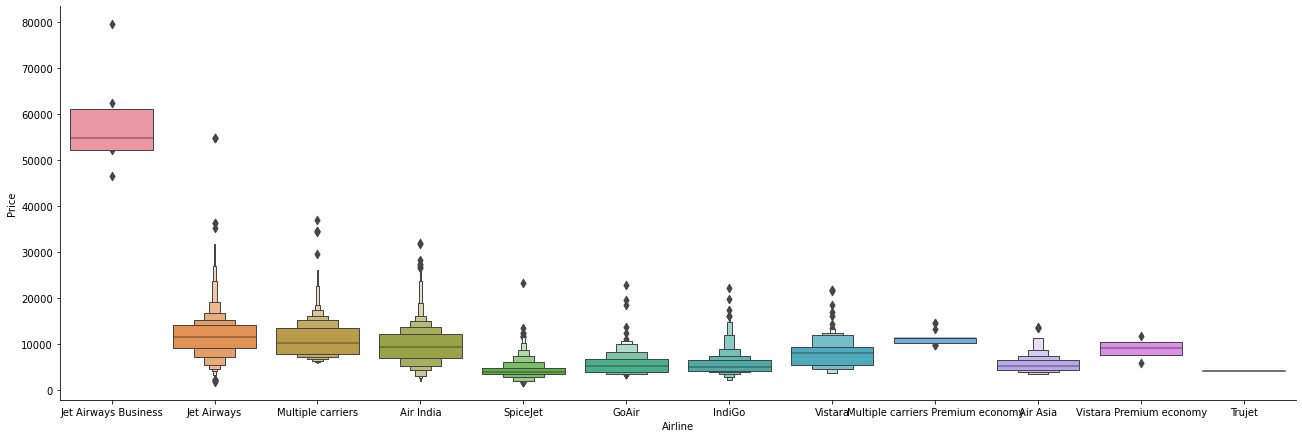

In [41]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that Jet Airways Business have the highest Price.                                    
Apart from the first Airline almost all are having similar median.

#### Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use One-Hot encoding to handle this variable

##### Feature Engineering

In [42]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


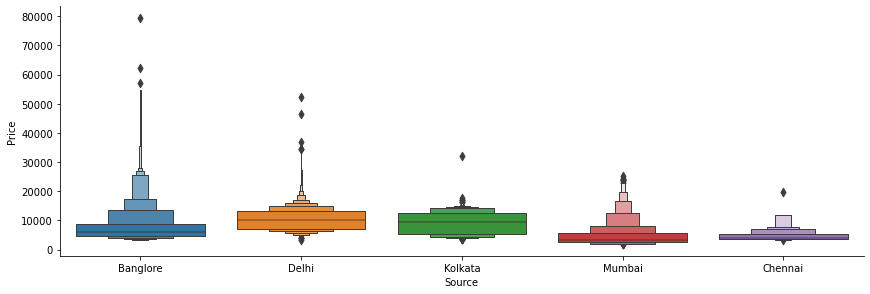

In [43]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#### Again 'Source' and 'Destination' varaiables are Nominal Categorical Data. We will use One-Hot Encoding again to handle these two variables

In [44]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
df['Additional_Info'].value_counts()/df.shape[0]

No info                         0.780680
In-flight meal not included     0.185435
No check-in baggage included    0.029954
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
Red-eye flight                  0.000094
2 Long layover                  0.000094
1 Short layover                 0.000094
Name: Additional_Info, dtype: float64

#### Route variable represents the path of the journey. Since the 'total_stops' variable captures the information if the flight is direct or connected so I have decided to drop this variable

In [48]:
# Additional_Info contains almost more than 75% no_info
# Route and Total_Stops are related to each other
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious. We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable

In [49]:
# Here Values are assigned with corresponding keys
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

##### Now we will create the final dataframe by concatenating all the One-Hot and Label-Encoded features to the original dataframe. We will also remove original variables using which we have prepared new encoded variables.

In [50]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([df, Airline, Source, Destination], axis = 1)

In [51]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [52]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [55]:
X = data_train.drop(['Price'], axis = 1)
X.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
y = df.Price

### Performing Linear Regression with OLS

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100 )

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [61]:
m1 = sm.OLS(y_train,X_train).fit()

In [62]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:19:57   Log-Likelihood:                -70162.
No. Observations:                7478   AIC:                         1.404e+05
Df Residuals:                    7450   BIC:                         1.406e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      6976.3993   4102.563      1.700      0.089   -1065.782     1.5e+04
Total_Stops                                2749.2909     88.523     31.057      0.000    2575.761    2922.821
Journey_day                                 -76.4973      3.976    -19.239      0.000     -84.292     -68.703
Journey_month                              -422.4984     32.797    -12.882      0.000    -486.789    -358.208
Dep_hour                                     25.6523      5.998      4.277      0.000      13.894      37.411
Dep_min                                      -1.4704      1.871     -0.786      0.432      -5.139       2.198
Arrival_hour                                 -9.8600      5.079     -1.941      0.052     -19.816       0.096
Arrival_min                                   0.5761      2.166      0.266      0.790      -3.670       4.822
Duration_hours                               -1.4171      6.280     -0.226      0.821     -13.727      10.893
Duration_mins                                -3.8111      2.091     -1.823      0.068      -7.910       0.287
Airline_Air India                          1639.7367    226.008      7.255      0.000    1196.698    2082.775
Airline_GoAir                                28.7491    312.684      0.092      0.927    -584.200     641.698
Airline_IndiGo                              208.8829    214.873      0.972      0.331    -212.329     630.095
Airline_Jet Airways                        4388.3223    212.702     20.631      0.000    3971.367    4805.277
Airline_Jet Airways Business               4.366e+04   1458.101     29.940      0.000    4.08e+04    4.65e+04
Airline_Multiple carriers                  3601.7595    234.229     15.377      0.000    3142.605    4060.914
Airline_Multiple carriers Premium economy  3862.1392   1195.681      3.230      0.001    1518.266    6206.013
Airline_SpiceJet                           -297.1049    235.265     -1.263      0.207    -758.290     164.081
Airline_Trujet                            -2644.5386   2892.905     -0.914      0.361   -8315.450    3026.373
Airline_Vistara                            2152.7625    259.574      8.293      0.000    1643.924    2661.601
Airline_Vistara Premium economy            2731.2139   2047.925      1.334      0.182   -1283.297    6745.725
Source_Chennai                              229.1669   2042.782      0.112      0.911   -3775.263    4233.597
Source_Delhi                               -507.9686   2889.374     -0.176      0.860   -6171.958    5156.020
Source_Kolkata                              451.2739   4081.548      0.111      0.912   -7549.714    8452.262
Source_Mumbai                              -666.5732   2041.980     -0.326      0.744   -4669.432    3336.285
Des

In [63]:
ypred = m1.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,ypred)
r_squared = r2_score(y_test,ypred)

In [65]:
from math import sqrt
rsme = sqrt(mse)
rsme

2732.148471932094

In [66]:
print('Mean_Squared_Error:', mse)
print('Root_Mean_Squared_Error:', rsme)
print('r_squared_value:', r_squared)

Mean_Squared_Error: 7464635.272680874
Root_Mean_Squared_Error: 2732.148471932094
r_squared_value: 0.6429995534174062


C:\Users\HP840\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP840\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

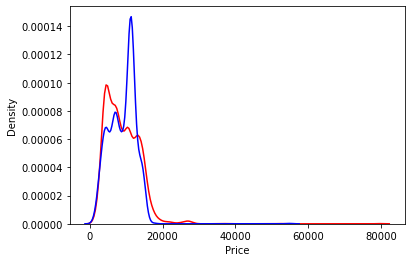

In [67]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

In [68]:
# K- Fold Cross Validation.
folds = 5
cv_mse = []
x = X_train.values
y = y_train.values
from sklearn.model_selection import KFold
kf = KFold(folds)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
    print('train = ', train_index)
    print('test = ', test_index)
    print("\n")
    
for train_index , test_index in kf.split(x):
    cv_trainx , cv_testx = x[train_index], x[test_index]
    cv_trainy , cv_testy = y[train_index] , y[test_index]
    #Build the mdoel
    m = sm.OLS(cv_trainy, cv_trainx).fit()
    p = m.predict(cv_testx)
    #store the mse in the list of each model
    cv_mse.append(np.round(mean_squared_error(cv_testy, p),3))
    
    

train =  [1496 1497 1498 ... 7475 7476 7477]
test =  [   0    1    2 ... 1493 1494 1495]


train =  [   0    1    2 ... 7475 7476 7477]
test =  [1496 1497 1498 ... 2989 2990 2991]


train =  [   0    1    2 ... 7475 7476 7477]
test =  [2992 2993 2994 ... 4485 4486 4487]


train =  [   0    1    2 ... 7475 7476 7477]
test =  [4488 4489 4490 ... 5980 5981 5982]


train =  [   0    1    2 ... 5980 5981 5982]
test =  [5983 5984 5985 ... 7475 7476 7477]




In [69]:
cv_mse

[8542604.451, 8166101.992, 8680557.566, 9199005.955, 7100856.265]

In [70]:
#Mean MSE Of K-fold CV
np.mean(cv_mse)

8337825.245800001

In [71]:
#RSME
rsme_tr=(sqrt(np.mean(cv_mse)))
rsme_tr

2887.5292631937086

In [72]:
#Predict on the test data
p1 = m1.predict(X_test)

In [73]:
# MSE of model 1
mse1 = round(mean_squared_error(y_test,p1),3)

In [74]:
mse1

7464635.273

In [75]:
#rsme of testing
rsme_ts = sqrt(mse1)
rsme_ts

2732.1484719904956

In [76]:
# compare the train and test errors
print("Training MSE = {}, Testing MSE = {}".format(np.mean(cv_mse),mse1))

Training MSE = 8337825.245800001, Testing MSE = 7464635.273


In [77]:
# compare the train and test errors
print("Training RMSE = {}, Testing RMSE = {}".format(rsme_tr,rsme_ts))

Training RMSE = 2887.5292631937086, Testing RMSE = 2732.1484719904956


### Implementing Decesion Tree 

In [79]:
#Import the Decesion Tree Regressor
from sklearn.tree import DecisionTreeRegressor
m2 = DecisionTreeRegressor(random_state=100)

#Fit the Regressor
ds_dt = m2.fit(X_train,y_train)

In [80]:
y_pred_dt = m2.predict(X_test)

#Model Evaluation using R2 for Decision Tree Regressor
from sklearn import metrics
r_sq = metrics.r2_score(y_test,y_pred_dt)
print("R_Sq associated with Decision tree regressor is:",r_sq )

R_Sq associated with Decision tree regressor is: 0.7307128860156045


In [81]:
from sklearn.metrics import mean_absolute_error, r2_score

In [82]:
mae = mean_absolute_error(y_test,y_pred_dt)
mae

1353.5917472698911

In [83]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
mse_dt

5630609.45376521

In [84]:
rmse_dt = sqrt(mse_dt)
rmse_dt

2372.890527134619

### Hyperparameter Tuning Decesion Tree

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = RandomizedSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 20, 'criterion': 'mse'}


C:\Users\HP840\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [           nan -1543.09175263 -1419.51879049            nan
 -1460.20798645            nan -1478.01206296 -1543.09175263
 -1446.24574558            nan]
  warnings.warn(


In [87]:
dt_model = DecisionTreeRegressor(**clf.best_params_)
dt_model.fit(X_train, y_train)
dt_ypred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_ypred)
dt_rmse = sqrt(dt_mse)
print('Mean_Squared_Error:',dt_mse)
print('Root_Mean_Squared_Error',dt_rmse)

Mean_Squared_Error: 5265537.209709644
Root_Mean_Squared_Error 2294.675839788628


In [88]:
r_sq = metrics.r2_score(y_test,dt_ypred)
print("R_Sq associated with Decision tree regressor is:",r_sq )

R_Sq associated with Decision tree regressor is: 0.7481726746592281


### Implementing Random Forest Regressor


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [90]:
r_sq_rf = metrics.r2_score(y_test,y_pred_rf)
print("R_Sq associated with Decision tree regressor is:",r_sq_rf )

R_Sq associated with Decision tree regressor is: 0.8247947637889477


In [91]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = sqrt(mse_rf)

In [92]:
print('Mean_Squared_Error:', mse_rf)
print('Root_Mean_Squared_Error:', rmse_rf)

Mean_Squared_Error: 3663421.709128954
Root_Mean_Squared_Error: 1914.0067160616113


### Hyperparameter Tuning Random Forest

In [93]:
X_train.shape

(7478, 30)

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to be considered at every split
max_features = ['auto','srqt']
# Max number of levels in tree
max_depth = [2,4]
# Minimum number of samples required in node split
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [95]:
# Create a parm grid
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'srqt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [96]:
rf_ran_cv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid, cv =10 , verbose = 2, n_jobs=4)

In [97]:
rf_ran_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\HP840\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.79705995 0.79100218        nan 0.71746477 0.70327629
 0.79009214        nan        nan        nan]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'srqt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [98]:
 rf_ran_cv.best_params_

{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': True}

In [99]:
rf_model = RandomForestRegressor(**rf_ran_cv.best_params_)
rf_model.fit(X_train, y_train)
rf_ypred = dt_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_ypred)
rf_rmse = sqrt(rf_mse)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',rf_rmse)

Mean_Squared_Error: 5265537.209709644
Root_Mean_Squared_Error 2294.675839788628


### Implementing XGbooosting

In [100]:
!pip install xgboost

You should consider upgrading via the 'c:\users\hp840\anaconda3\python.exe -m pip install --upgrade pip' command.


In [101]:
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [102]:
xgb_model = XGBRegressor(**clf.best_params_)
xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_ypred)
xgb_rmse = sqrt(xgb_mse)
print('Mean_Squared_Error:',xgb_mse)
print('Root_Mean_Squared_Error',xgb_rmse)

Mean_Squared_Error: 3232759.703798728
Root_Mean_Squared_Error 1797.9876817705754


In [103]:
r_sq_xgb = metrics.r2_score(y_test,xgb_ypred)
print("R_Sq associated with Decision tree regressor is:",r_sq_xgb)

R_Sq associated with Decision tree regressor is: 0.8453914202380215


### Selecting the model with least RMSE amongst all algorithms

In [104]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Decision Tree',
                    'Random Forest','XGBoost'], 'RMSE': [rsme,
                    rmse_dt,rmse_rf,xgb_rmse]}) 
model_ev

,Model,RMSE
0,Linear Regression,2732.148472
1,Decision Tree,2372.890527
2,Random Forest,1914.006716
3,XGBoost,1797.987682
